In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=35377e332987627280de1eadc5d02e9a


In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | belyy yar
Processing Record 2 of Set 13 | mezokeresztes
Processing Record 3 of Set 13 | cuamba
Processing Record 4 of Set 13 | san cristobal
Processing Record 5 of Set 13 | albany
Processing Record 6 of Set 13 | thompson
Processing Record 7 of Set 13 | mataura
Processing Record 8 of Set 13 | marsh harbour
Processing Record 9 of Set 13 | kieta
Processing Record 10 of Set 13 | tasiilaq
Processing Record 11 of Set 13 | guerrero negro
Processing Record 12 of Set 13 | jamestown
Processing Record 13 of Set 13 | hilo
Processing Record 14 of Set 13 | husavik
Processing Record 15 of Set 13 | jerantut
Processing Record 16 of Set 13 | nantucket
Processing Record 17 of Set 13 | tokur
Processing Record 18 of Set 13 | okhotsk
Processing Record 19 of Set 13 | souillac
Processing Record 20 of Set 13 | kloulklubed
Processing Record 21 of Set 13 | vaini
Processing Record 22 of Set 13 | kapaa
Processing Record 23 of Set 13 | tsihombe
City not found. Skipping...
Processing 

Processing Record 34 of Set 16 | verkhovazhye
Processing Record 35 of Set 16 | vardo
Processing Record 36 of Set 16 | opuwo
Processing Record 37 of Set 16 | panzhihua
Processing Record 38 of Set 16 | san patricio
Processing Record 39 of Set 16 | lucapa
Processing Record 40 of Set 16 | tuktoyaktuk
Processing Record 41 of Set 16 | aquiraz
Processing Record 42 of Set 16 | isla mujeres
Processing Record 43 of Set 16 | enkoping
Processing Record 44 of Set 16 | santa cruz
Processing Record 45 of Set 16 | salihorsk
Processing Record 46 of Set 16 | deer lake
Processing Record 47 of Set 16 | aguimes
Processing Record 48 of Set 16 | geraldton
Processing Record 49 of Set 16 | harper
Processing Record 50 of Set 16 | aflu
City not found. Skipping...
Processing Record 1 of Set 17 | san buenaventura
Processing Record 2 of Set 17 | saint george
Processing Record 3 of Set 17 | alofi
Processing Record 4 of Set 17 | mayo
Processing Record 5 of Set 17 | atherton
Processing Record 6 of Set 17 | san rafael


Processing Record 16 of Set 20 | shingu
Processing Record 17 of Set 20 | pochutla
Processing Record 18 of Set 20 | mfou
Processing Record 19 of Set 20 | bell ville
Processing Record 20 of Set 20 | miyako
Processing Record 21 of Set 20 | pervomayskiy
Processing Record 22 of Set 20 | ponta delgada
Processing Record 23 of Set 20 | mattru
Processing Record 24 of Set 20 | santa eulalia del rio
City not found. Skipping...
Processing Record 25 of Set 20 | port-gentil
Processing Record 26 of Set 20 | dikson
Processing Record 27 of Set 20 | ayan
Processing Record 28 of Set 20 | san isidro
Processing Record 29 of Set 20 | maldonado
Processing Record 30 of Set 20 | auki
Processing Record 31 of Set 20 | terrasini
Processing Record 32 of Set 20 | shenjiamen
Processing Record 33 of Set 20 | forestville
Processing Record 34 of Set 20 | pecos
Processing Record 35 of Set 20 | svetlyy
Processing Record 36 of Set 20 | grafton
Processing Record 37 of Set 20 | moyo
Processing Record 38 of Set 20 | am timan

Processing Record 4 of Set 24 | bad salzungen
Processing Record 5 of Set 24 | hualmay
Processing Record 6 of Set 24 | beisfjord
Processing Record 7 of Set 24 | morki
Processing Record 8 of Set 24 | raudeberg
Processing Record 9 of Set 24 | pangkalanbuun
Processing Record 10 of Set 24 | gambiran
Processing Record 11 of Set 24 | sangar
Processing Record 12 of Set 24 | thakurgaon
Processing Record 13 of Set 24 | toulepleu
City not found. Skipping...
Processing Record 14 of Set 24 | hervey bay
Processing Record 15 of Set 24 | medina del campo
Processing Record 16 of Set 24 | creel
Processing Record 17 of Set 24 | tysmenytsya
Processing Record 18 of Set 24 | banjar
Processing Record 19 of Set 24 | kysyl-syr
Processing Record 20 of Set 24 | chapleau
Processing Record 21 of Set 24 | sabha
Processing Record 22 of Set 24 | zheleznodorozhnyy
Processing Record 23 of Set 24 | fairbanks
Processing Record 24 of Set 24 | praia da vitoria
Processing Record 25 of Set 24 | mutsamudu
City not found. Skip

In [12]:
len(city_data)

573

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Belyy Yar,53.6039,91.3903,33.80,40,0,8.95,RU,2021-04-23 17:44:24
1,Mezokeresztes,47.8333,20.7000,45.68,65,46,8.03,HU,2021-04-23 17:44:24
2,Cuamba,-14.8031,36.5372,66.43,83,19,3.78,MZ,2021-04-23 17:44:24
3,San Cristobal,7.7669,-72.2250,89.60,55,20,14.97,VE,2021-04-23 17:44:25
4,Albany,42.6001,-73.9662,57.00,25,23,3.00,US,2021-04-23 17:41:01
5,Thompson,55.7435,-97.8558,24.80,42,40,9.22,CA,2021-04-23 17:39:58
6,Mataura,-46.1927,168.8643,44.01,96,32,1.99,NZ,2021-04-23 17:44:24
7,Marsh Harbour,26.5412,-77.0636,73.22,70,88,16.87,BS,2021-04-23 17:44:25
8,Kieta,-6.2167,155.6333,77.02,86,99,1.14,PG,2021-04-23 17:44:26
9,Tasiilaq,65.6145,-37.6368,35.60,60,90,3.44,GL,2021-04-23 17:44:26


In [14]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [15]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Belyy Yar,RU,2021-04-23 17:44:24,53.6039,91.3903,33.80,40,0,8.95
1,Mezokeresztes,HU,2021-04-23 17:44:24,47.8333,20.7000,45.68,65,46,8.03
2,Cuamba,MZ,2021-04-23 17:44:24,-14.8031,36.5372,66.43,83,19,3.78
3,San Cristobal,VE,2021-04-23 17:44:25,7.7669,-72.2250,89.60,55,20,14.97
4,Albany,US,2021-04-23 17:41:01,42.6001,-73.9662,57.00,25,23,3.00
...,...,...,...,...,...,...,...,...,...
568,Ust-Nera,RU,2021-04-23 17:47:05,64.5667,143.2000,-4.16,97,94,1.43
569,Korla,CN,2021-04-23 17:47:05,41.7597,86.1469,45.12,69,3,11.83
570,Nara,JP,2021-04-23 17:43:14,34.6851,135.8049,61.00,65,100,3.15
571,Sovetskiy,RU,2021-04-23 17:47:05,61.3614,63.5842,39.99,95,100,4.72


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1619200113.7432785

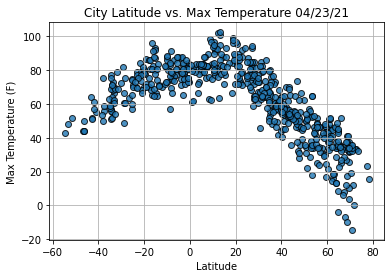

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

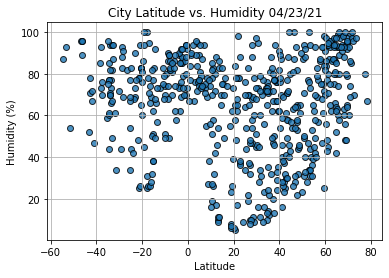

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

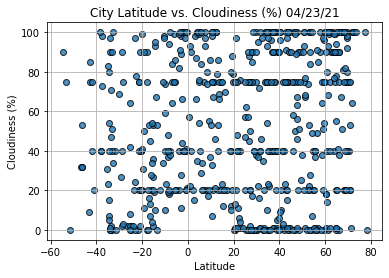

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

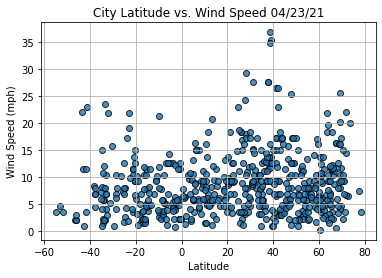

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [25]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line "y-values" from the slope and the intercept.
    regress_values = x_values * slope + intercept
    
    #Get the equation of the line.
    line_eq = "y= " + str(round(slope,2)) + "x + " +str(round(intercept,2))
    
    #Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    #Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color= "red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
    print(f"The r-value is {r_value:.3f}")

In [26]:
index13 = city_data_df.loc[13]
index13

City                      Husavik
Country                        IS
Date          2021-04-23 17:44:05
Lat                       66.0449
Lng                      -17.3389
Max Temp                     51.8
Humidity                       58
Cloudiness                      0
Wind Speed                  10.36
Name: 13, dtype: object

In [27]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
568     True
569     True
570     True
571     True
572     True
Name: Lat, Length: 573, dtype: bool

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Belyy Yar,RU,2021-04-23 17:44:24,53.6039,91.3903,33.80,40,0,8.95
1,Mezokeresztes,HU,2021-04-23 17:44:24,47.8333,20.7000,45.68,65,46,8.03
3,San Cristobal,VE,2021-04-23 17:44:25,7.7669,-72.2250,89.60,55,20,14.97
4,Albany,US,2021-04-23 17:41:01,42.6001,-73.9662,57.00,25,23,3.00
5,Thompson,CA,2021-04-23 17:39:58,55.7435,-97.8558,24.80,42,40,9.22


In [29]:
# Create Northern and Southern Hemisphere dataframes.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

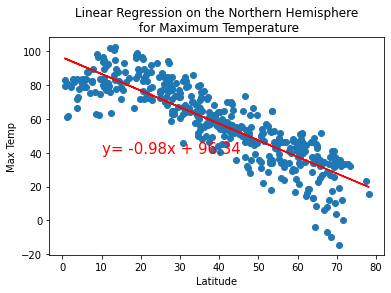

The r-value is -0.867


In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                        "Linear Regression on the Northern Hemisphere\n for Maximum Temperature", "Max Temp",(10,40))

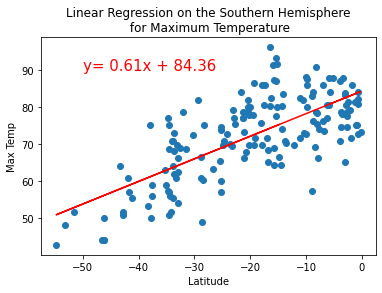

The r-value is 0.713


In [31]:
#Linear regression on the southern hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Call the function.
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemisphere\n for Maximum Temperature", "Max Temp", (-50,90))

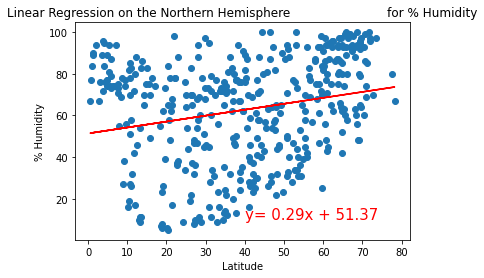

The r-value is 0.228


In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

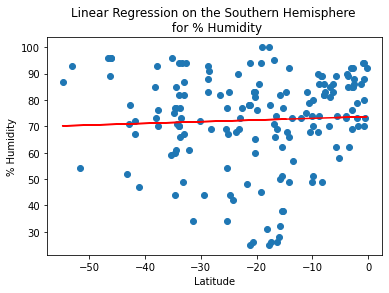

The r-value is 0.048


In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

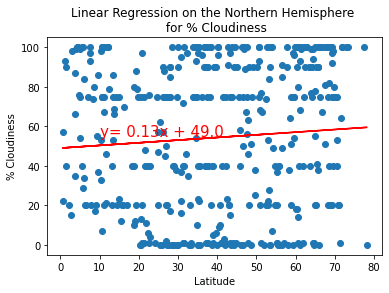

The r-value is 0.074


In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

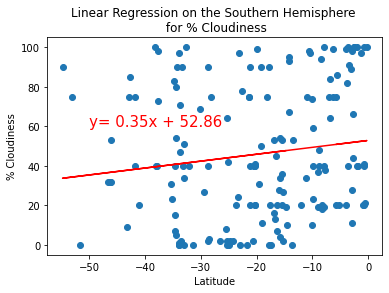

The r-value is 0.139


In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

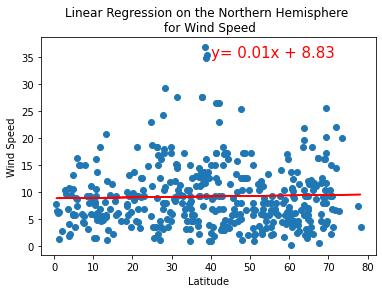

The r-value is 0.031


In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

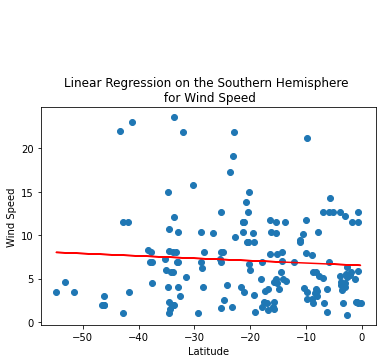

The r-value is -0.075


In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))